# Model Training
# Checking the Python Environment

This is to ensure that the correct Python environment is set up correctly and used

In [1]:
import sys
import IPython

# Change path to append here
sys.path.append(r'C:\Users\hp\Documents\Machine_Learning_Assignment')

print("Python executable:", sys.executable)
print("Python version:", sys.version)
print("Kernel:", IPython.get_ipython().kernel)
print("Sys paths:", sys.path)

Python executable: C:\Users\hp\anaconda3\envs\machine_learning_assignment\python.exe
Python version: 3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]
Kernel: <ipykernel.ipkernel.IPythonKernel object at 0x000001709F3D5110>
Sys paths: ['C:\\Users\\hp\\Documents\\Machine_Learning_Assignment\\testing', 'C:\\Users\\hp\\Documents\\Machine_Learning_Assignment', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\python311.zip', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\DLLs', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\Lib', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment', '', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\Lib\\site-packages', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\Lib\\site-packages\\win32', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learn

# Importing Libraries

In [2]:
import pandas as pd
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Loading the dataset

The following shows the normalised and scaled datasets, one with PCA and another without PCA

In [4]:
df = pd.read_csv(r'../raw_data/customer_standard_scaled.csv', index_col='CUST_ID')
df_pca = pd.read_csv(r'../raw_data/customer_pca_5.csv', index_col='CUST_ID')

# Model Training: Mean Shift

Mean Shift is a clustering algorithm used to pick out dense areas in a dataset and assign facts and factors to their respective clusters. It is a non-parametric, density-based clustering technique, which means it does not require any previous assumptions approximately the wide variety of clusters or their shapes.

The following describe how the mean shift works:
1) Create a sliding window for each data-point
2) Each of the sliding windows is shifted towards higher density regions by shifting their centroid (center of the sliding window) to the data-points' mean within the sliding window. This step will be repeated until no shift yields a higher density (number of points in the sliding window)
3) Selection of sliding windows by deleting overlapping windows. When multiple sliding windows overlap, the window containing the most points is preserved, and the others are deleted
4) Assigning the data points to the sliding window in which they reside

Key parameter of Mean Shift:
1) Bandwidth: The radius of the sliding window

References: 
1) https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html
2) https://www.geeksforgeeks.org/mean-shift-clustering-using-sklearn/ 
3) https://ml-explained.com/blog/mean-shift-explained

In [5]:
# The bandwidth is estimated using sklearn.cluster.estimate_bandwidth
mean_shift = MeanShift()
mean_shift.fit(df)

mean_shift_pca = MeanShift()
mean_shift_pca.fit(df_pca)

MeanShift()

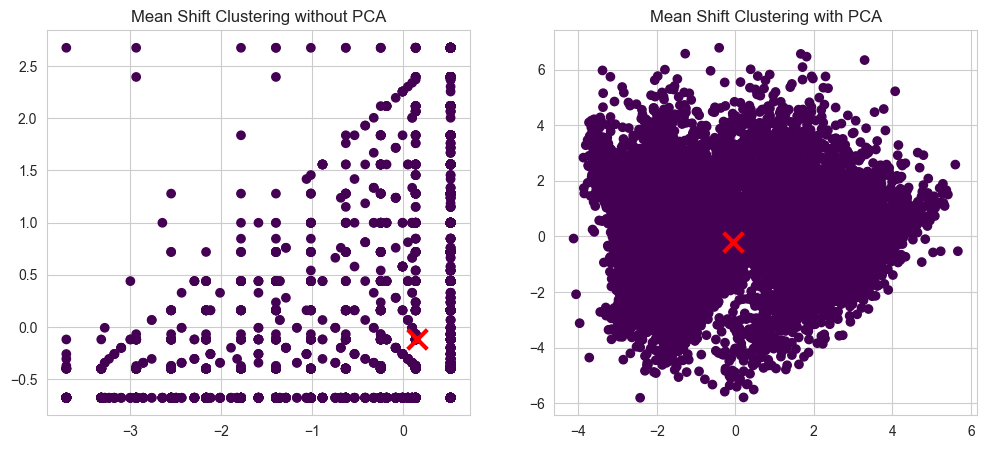

In [7]:
# Visualisation of the clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=mean_shift.labels_, cmap='viridis', marker='o')
plt.scatter(mean_shift.cluster_centers_[:, 0], mean_shift.cluster_centers_[:, 1],
            c='red', marker='x', s=200, linewidths=3, label='Cluster Centers')
plt.title('Mean Shift Clustering without PCA')

plt.subplot(1, 2, 2)
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=mean_shift_pca.labels_, cmap='viridis', marker='o')
plt.scatter(mean_shift_pca.cluster_centers_[:, 0], mean_shift_pca.cluster_centers_[:, 1],
            c='red', marker='x', s=200, linewidths=3, label='Cluster Centers')
plt.title('Mean Shift Clustering with PCA')

plt.show()

# Model Evaluation : 1) Silhouette Score

The Silhouette score is calculated by measuring each data point’s similarity to the cluster it belongs to and how different it is from other clusters.

It ranges from -1 to +1:

- Positive values indicate that data points belong to the correct clusters, indicating good clustering results.
- A score of zero suggests overlapping clusters or data points equally close to multiple clusters.
- Negative values indicate that data points are assigned to incorrect clusters, indicating poor clustering results.

A higher Silhouette score indicates better clustering results.

For every single data point $i$, the Silhoutte Score $s(i)$ is

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

where $a(i)$ is the average distance between the sample $i$ and all other points in the same cluster; $b(i)$ is the minimum average distance from the sample $i$ to all points in the nearest cluster that is not the sample's own cluster.

References:
1) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
2) https://medium.com/@hazallgultekin/what-is-silhouette-score-f428fb39bf9a

In [8]:
silhouette_mean_shift = silhouette_score(df, mean_shift.labels_)
silhouette_mean_shift_pca = silhouette_score(df_pca, mean_shift_pca.labels_)

print("Silhouette Score of Mean Shift without PCA", silhouette_mean_shift)
print("Silhouette Score of Mean Shift with PCA", silhouette_mean_shift_pca)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)